# 제1회 퀀텀 AI 경진대회 베이스라인 (상세 설명 버전)

**양자 컴퓨팅과 인공지능(AI)의 만남, 양자 머신 러닝(QML)의 세계에 오신 것을 환영합니다!**

이 노트북은 양자 컴퓨팅이나 QML에 대한 사전 지식이 없는 분들을 위해 기존 베이스라인 코드를 상세히 설명하고, 핵심적인 이론과 개념을 추가한 버전입니다. 단순히 코드를 실행하는 것을 넘어, 각 단계가 어떤 의미를 가지는지 이해하며 양자 머신 러닝의 기초를 다질 수 있도록 돕는 것을 목표로 합니다.

## 1. 양자 컴퓨팅 & QML 핵심 개념 알아보기

코드를 살펴보기 전에, 몇 가지 기본적인 개념을 먼저 알아봅시다.

### 1.1. 양자 컴퓨팅이란?

양자 컴퓨팅은 **양자역학의 원리**를 이용하여 계산을 수행하는 새로운 방식의 컴퓨팅입니다. 기존 컴퓨터가 0 또는 1의 값을 가지는 '비트(bit)'를 사용하는 반면, 양자 컴퓨터는 **'큐빗(qubit)'**이라는 단위를 사용합니다.

### 1.2. 큐빗 (Qubit): 중첩과 얽힘

큐빗은 양자 컴퓨팅의 핵심입니다. 비트와 가장 큰 차이점은 **중첩(Superposition)** 과 **얽힘(Entanglement)** 이라는 독특한 특성을 가진다는 점입니다.

*   **중첩(Superposition):** 큐빗은 0과 1의 상태를 동시에 가질 수 있습니다. 마치 동전이 공중에 떠서 회전하는 동안 앞면과 뒷면의 상태를 동시에 가지는 것과 비슷합니다. 이 덕분에 큐빗 하나는 비트보다 훨씬 더 많은 정보를 표현할 수 있습니다.
*   **얽힘(Entanglement):** 두 개 이상의 큐빗이 서로 연결되어, 하나의 큐빗 상태가 결정되면 다른 큐빗의 상태가 즉시 결정되는 현상입니다. 이 특성을 이용하면 큐빗들 간의 복잡한 관계를 모델링하고, 계산 능력을 기하급수적으로 향상시킬 수 있습니다.

### 1.3. 양자 게이트 (Quantum Gate)와 양자 회로 (Quantum Circuit)

*   **양자 게이트:** 큐빗의 상태를 바꾸는 연산입니다. 기존 컴퓨터의 논리 게이트(AND, OR, NOT 등)와 유사한 역할을 합니다. 이 노트북에서는 다음과 같은 게이트들을 사용합니다.
    *   `H (아다마르 게이트)`: 큐빗을 0 또는 1 상태에서 중첩 상태로 만듭니다.
    *   `S (S 게이트)`: 큐빗의 위상(phase)을 바꿉니다.
    *   `RX, RY, RZ (회전 게이트)`: 큐빗을 X, Y, Z축을 기준으로 특정 각도만큼 회전시킵니다. 이 각도를 머신러닝의 '파라미터'로 사용하여 학습을 진행할 수 있습니다.
    *   `CNOT (제어된 NOT 게이트)`: 두 큐빗을 사용하는 게이트로, 하나의 제어 큐빗이 1일 때만 다른 대상 큐빗의 상태를 0에서 1로, 1에서 0으로 바꿉니다. 큐빗 간의 얽힘을 만드는 데 사용됩니다.

*   **양자 회로:** 양자 게이트들을 순서대로 연결하여 구성한 것입니다. 양자 알고리즘을 구현하는 설계도와 같습니다. QML에서는 이 양자 회로 자체가 머신러닝 모델의 일부(예: 신경망의 레이어)가 됩니다.

### 1.4. 양자 머신 러닝 (QML)과 Pennylane

*   **QML:** 양자 컴퓨팅의 원리를 머신러닝에 적용한 분야입니다. 양자 회로를 머신러닝 모델의 일부로 사용하여, 기존 방식으로는 해결하기 어려운 복잡한 문제를 풀 수 있는 가능성을 탐구합니다.

*   **Pennylane:** 이 노트북에서 사용할 QML 프레임워크입니다. 캐나다의 Xanadu AI에서 만들었으며, PyTorch나 TensorFlow와 같은 기존 머신러닝 프레임워크와 쉽게 결합하여 QML 모델을 만들고 학습시킬 수 있도록 도와줍니다. 양자 회로의 파라미터를 자동으로 미분하고 최적화하는 강력한 기능을 제공합니다.

---

## 2. 개발 환경 설정

이제 본격적으로 코드를 실행하며 QML의 세계로 들어가 보겠습니다. 가장 먼저 필요한 라이브러리들을 설치합니다.

In [1]:
# Pennylane과 시각화를 위한 Matplotlib를 설치합니다.
!pip install pennylane matplotlib

### 수정로그

2025/7/14 전체 파라미터 수를 50,000으로 제한

## 3. Pennylane으로 양자 회로 만들기

가장 기본적인 양자 회로를 Pennylane으로 직접 만들어보며 사용법을 익혀봅시다.

In [2]:
import pennylane as qml # Pennylane은 보통 qml이라는 별칭으로 가져옵니다. (Quantum Machine Learning의 약자)
import numpy as np

# 1. 양자 디바이스(Device) 정의하기
# 양자 회로를 실행할 백엔드를 설정합니다. 'default.qubit'은 Pennylane에서 제공하는 기본 큐빗 시뮬레이터입니다.
# wires=3은 이 시뮬레이터에서 3개의 큐빗을 사용하겠다는 의미입니다.
dev = qml.device("default.qubit", wires=3)

# 2. QNode로 양자 회로 정의하기
# @qml.qnode(dev) 데코레이터는 파이썬 함수를 양자 회로(QNode)로 변환해줍니다.
# 이 함수는 위에서 정의한 'dev' 디바이스 위에서 실행됩니다.
@qml.qnode(dev)
def circuit():
    # 3. 양자 게이트 적용하기
    qml.H(0) # 0번 큐빗에 아다마르(H) 게이트를 적용합니다.
    qml.S(0) # 0번 큐빗에 S 게이트를 적용합니다.
    qml.H(1) # 1번 큐빗에 아다마르(H) 게이트를 적용합니다.
    qml.H(2) # 2번 큐빗에 아다마르(H) 게이트를 적용합니다.
    
    # 4. 측정(Measurement)하기
    # return qml.probs()는 모든 큐빗 상태에 대한 측정 확률을 반환합니다.
    # 3개의 큐빗이 있으므로, 2^3 = 8개의 상태(|000>부터 |111>까지)에 대한 확률이 계산됩니다.
    return qml.probs()

### 3.1. 양자 회로 시각화하기

방금 정의한 양자 회로가 어떻게 생겼는지 그림으로 확인해 봅시다. 시각화는 복잡한 회로의 구조를 직관적으로 이해하는 데 큰 도움이 됩니다.

In [3]:
# qml.draw 함수는 QNode를 텍스트 기반의 회로도로 그려줍니다.
print(qml.draw(circuit)())

0: ──H──S─┤  Probs
1: ──H────┤  Probs
2: ──H────┤  Probs


(<Figure size 500x400 with 1 Axes>, <Axes: >)

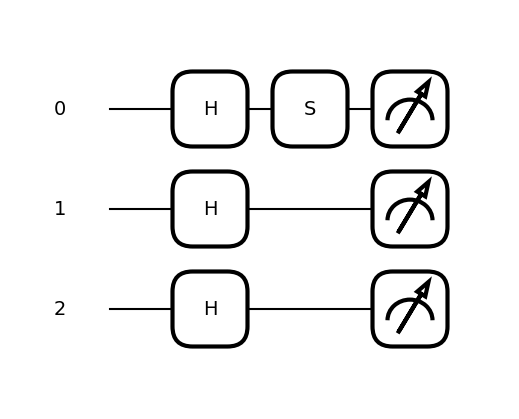

In [4]:
# qml.draw_mpl 함수는 Matplotlib을 사용하여 더 보기 좋은 회로도를 그려줍니다.
qml.draw_mpl(circuit)()

**[회로도 해석]**
- 각 수평선은 하나의 큐빗을 나타냅니다. (위에서부터 0번, 1번, 2번 큐빗)
- 선 위의 상자들은 해당 큐빗에 적용되는 양자 게이트를 의미합니다. (H: 아다마르, S: S 게이트)
- 마지막의 `Probs`는 모든 큐빗의 최종 상태를 기반으로 확률을 측정한다는 의미입니다.

### 3.2. 백엔드 (Backend)와 디바이스 (Device)

양자 회로를 실제로 구동하는 시뮬레이터 또는 실제 양자 컴퓨터를 **백엔드**라고 합니다. Pennylane에서는 이를 **디바이스(Device)** 라고 부릅니다.

| 양자 회로 용어 | 머신러닝 용어 비유 |
|:---:|:---:|
| Quantum Circuit | Layer, ML Module |
| Backend / Device | device (CPU, GPU, TPU, ...) |

Pennylane은 다양한 백엔드를 지원합니다. 간단한 시뮬레이션에는 `default.qubit`이, 고성능 시뮬레이션에는 C++로 작성된 `lightning.qubit`이 주로 사용됩니다. IBM이나 Google의 실제 양자 컴퓨터를 백엔드로 연결하여 사용할 수도 있습니다.

QML 모델을 개발하고 테스트할 때는 `default.qubit`이 가장 편리하고 권장됩니다.

In [ ]:
# 이 경진대회에서는 최대 20개의 큐빗을 사용할 수 있습니다.
NUMBER_OF_WIRES = 20

# shots=3000은 측정 횟수를 의미합니다. 
# 시뮬레이터에서는 확률을 정확히 계산할 수 있지만, 실제 양자 컴퓨터는 측정이 확률적이라 여러 번 반복(shot)하여 통계를 얻어야 합니다.
# 이 옵션은 실제 양자 컴퓨터 환경을 흉내 낼 때 유용합니다.
dev = qml.device("default.qubit", wires=NUMBER_OF_WIRES, shots=3000)

### 3.3. 측정 (Measurement)

양자 회로의 연산이 끝나면, 큐빗의 상태를 측정하여 고전적인 값(0 또는 1)을 얻어야 합니다. Pennylane은 여러 측정 방법을 제공합니다.

- `qml.probs()`: 각 계산 기저 상태(e.g., |00>, |01>, |10>, |11>)가 측정될 확률을 반환합니다. $N$개의 큐빗에 대해 $2^N$ 크기의 벡터를 출력합니다.
- `qml.expval(op)`: 주어진 관측량(Observable) `op`의 기댓값(expectation value)을 계산합니다. 머신러닝에서는 주로 이 기댓값을 모델의 출력(예측값)으로 사용합니다.
    - 가장 기본적인 관측량은 `qml.PauliX(i)`, `qml.PauliY(i)`, `qml.PauliZ(i)`로, 각각 i번 큐빗에 대한 파울리 X, Y, Z 연산자의 기댓값을 측정합니다.
    - `@` 연산자를 사용하여 여러 관측량을 조합할 수도 있습니다 (e.g., `qml.PauliZ(0) @ qml.PauliX(1)`).

In [ ]:
# 3개의 큐빗을 사용하는 새로운 디바이스를 정의합니다.
dev_3 = qml.device("default.qubit", wires=3)

# 예시 1: 0번 큐빗의 PauliX 기댓값 측정
@qml.qnode(dev_3)
def circuit1():
    qml.H(0)
    qml.H(1)
    return qml.expval(qml.PauliX(0))

# 예시 2: 모든 상태의 측정 확률 계산
@qml.qnode(dev_3)
def circuit2():
    qml.H(0)
    qml.H(1)
    return qml.probs()

# 예시 3: 각 큐빗의 PauliZ 기댓값을 리스트로 반환
@qml.qnode(dev_3)
def circuit3():
    qml.H(0)
    qml.H(1)
    return [qml.expval(qml.PauliZ(i)) for i in range(3)]

In [ ]:
# circuit1 실행 결과: 0번 큐빗에 H 게이트를 적용하면 |+> 상태가 되어 PauliX의 기댓값은 1에 가까워집니다.
print("PauliX(0) expectation:", circuit1())

In [ ]:
# circuit2 실행 결과: 0번과 1번 큐빗에 H 게이트를 적용했으므로, |000>, |010>, |100>, |110> 상태가 동일하게 0.25의 확률로 측정됩니다.
print("Probabilities:", circuit2())

In [ ]:
# circuit3 실행 결과: 0, 1번 큐빗은 |+> 상태이므로 PauliZ 기댓값은 0에 가깝고, 2번 큐빗은 |0> 상태이므로 PauliZ 기댓값은 1에 가깝습니다.
print("PauliZ expectations for each qubit:", circuit3())

## 4. 파라미터화된 양자 회로와 학습

이제 QML의 핵심인 **파라미터화된(parameterized) 양자 회로**를 만들어 보겠습니다. 이는 회로 내의 일부 게이트(주로 회전 게이트)에 학습 가능한 파라미터(변수)를 포함하는 회로를 의미합니다. 머신러닝 모델이 가중치(weight)를 학습하듯, QML 모델은 이 양자 회로의 파라미터를 학습합니다.

In [ ]:
# Pennylane은 자체적으로 NumPy와 유사한 인터페이스를 제공하며, 자동 미분을 지원합니다.
from pennylane import numpy as np_p

In [ ]:
dev = qml.device("default.qubit", wires=1) # 1개의 큐빗을 사용하는 디바이스

@qml.qnode(dev)
def single_qubit_circuit(theta, input_value):
    # theta: 학습 가능한 파라미터 (모델의 가중치 역할)
    # input_value: 외부에서 주어지는 입력 데이터 (머신러닝의 피처 역할)
    qml.RX(theta, wires=0) # theta 값에 따라 X축 회전
    qml.RY(input_value, wires=0) # input_value 값에 따라 Y축 회전
    return qml.expval(qml.PauliZ(0)) # Z 관측량의 기댓값을 출력

In [ ]:
single_qubit_circuit(0.1, 0.2) # 파라미터와 입력값을 넣어 회로 실행

### 4.1. Pennylane 옵티마이저를 이용한 회로 최적화

간단한 예시를 통해 양자 회로의 파라미터를 어떻게 학습하는지 알아봅시다. `single_qubit_circuit`의 출력이 -1 (PauliZ의 최소 기댓값)이 되도록 파라미터 `theta`를 최적화해보겠습니다.

In [ ]:
# Pennylane이 제공하는 기본 경사 하강법 옵티마이저를 사용합니다.
opt = qml.GradientDescentOptimizer(stepsize=0.01)

# 최대 반복 횟수와 수렴 조건을 설정합니다.
max_iterations = 500
conv_tol = 1e-06

# 학습할 파라미터를 랜덤하게 초기화합니다.
param = np_p.random.rand(1, requires_grad=True)

# 학습 기록을 저장할 리스트
his_param = []
his_energy = []

input_value_fixed = 0.5 # 입력값은 0.5로 고정합니다.

for i in range(max_iterations):
    # opt.step_and_cost: 비용 함수(여기서는 회로의 출력)를 계산하고, 
    # 그라디언트를 계산하여 파라미터를 한 스텝 업데이트합니다.
    param, prev_energy = opt.step_and_cost(lambda x: single_qubit_circuit(x, input_value_fixed), param)
    
    his_param.append(param)
    his_energy.append(prev_energy)
    
    # 업데이트된 파라미터로 다시 에너지(회로 출력)를 계산하여 수렴 여부를 확인합니다.
    energy = single_qubit_circuit(param, input_value_fixed)
    conv = np_p.abs(prev_energy - energy)
    
    if conv <= conv_tol:
        break

In [ ]:
import matplotlib.pyplot as plt

# 학습 과정에서 에너지(회로 출력)가 어떻게 변했는지 시각화합니다.
plt.plot(his_energy)
plt.title("Energy during optimization")
plt.xlabel("Iteration")
plt.ylabel("Expectation value of PauliZ")
plt.show()

**[그래프 해석]**
그래프에서 볼 수 있듯이, 반복(iteration)이 진행될수록 회로의 출력이 우리가 원했던 목표인 -1에 가까워지는 것을 확인할 수 있습니다. 이는 경사 하강법 옵티마이저가 비용 함수(회로 출력)를 최소화하는 방향으로 파라미터 `theta`를 성공적으로 학습시켰음을 의미합니다.

## 5. PyTorch와 통합하기

Pennylane의 가장 강력한 기능 중 하나는 PyTorch와 같은 주요 딥러닝 프레임워크와 매끄럽게 연동된다는 점입니다. 양자 회로(QNode)를 PyTorch의 신경망 레이어처럼 사용할 수 있습니다.

In [ ]:
# PyTorch를 설치합니다.
!pip install torch

In [ ]:
import torch
from torch.optim import Adam
from torch.nn.parameter import Parameter
from torch.nn import NLLLoss

# PyTorch가 GPU를 사용할 수 있으면 GPU를, 아니면 CPU를 사용하도록 설정합니다.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## 6. 하이브리드 QML 모델로 이미지 분류하기

이제 지금까지 배운 개념들을 총동원하여, **Fashion MNIST** 데이터셋의 이미지를 분류하는 하이브리드(고전+양자) 모델을 만들어 보겠습니다.

### 6.1. 데이터셋 준비

**Fashion MNIST**는 10가지 종류의 옷, 신발, 가방 등의 28x28 픽셀 흑백 이미지로 구성된 데이터셋입니다. 여기서는 문제를 단순화하여 두 개의 클래스, **'T-shirt/top'(레이블 0)**과 **'Coat'(레이블 6)**만을 분류하는 이진 분류(binary classification) 모델을 만들겠습니다.

In [ ]:
import torch
from torch.utils.data import Subset, DataLoader
import torchvision

# 이미지 데이터를 PyTorch 텐서로 변환하고, 픽셀 값을 -1과 1 사이로 정규화하는 전처리 과정을 정의합니다.
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,))
])

# Fashion MNIST 학습 데이터셋을 다운로드하고 불러옵니다.
train_ds = torchvision.datasets.FashionMNIST(
    "./", train=True, download=True, transform=transform
)

# Fashion MNIST 테스트 데이터셋을 다운로드하고 불러옵니다.
test_ds = torchvision.datasets.FashionMNIST(
    "./", train=False, download=True, transform=transform
)

# 학습 데이터셋에서 레이블이 0 또는 6인 데이터의 인덱스만 추출합니다.
train_mask = (train_ds.targets == 0) | (train_ds.targets == 6)
train_idx = torch.where(train_mask)[0]

# 나중에 손실 함수 계산을 편리하게 하기 위해, 레이블 6을 1로 바꿔줍니다. (0: T-shirt, 1: Coat)
train_ds.targets[train_ds.targets == 6] = 1

# 추출한 인덱스를 사용하여 레이블 0과 6의 데이터만으로 구성된 새로운 부분 데이터셋(Subset)을 만듭니다.
binary_train_ds = Subset(train_ds, train_idx)

# 학습 데이터를 배치(batch) 단위로 묶어주는 DataLoader를 생성합니다. 배치 크기는 1로 설정합니다.
train_loader = DataLoader(binary_train_ds, batch_size=1, shuffle=True)

#### 데이터 샘플 확인

In [ ]:
from matplotlib import pyplot as plt

n_samples_show = 8

data_iter = iter(train_loader)
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

while n_samples_show > 0:
    images, targets = next(data_iter)

    axes[n_samples_show - 1].imshow(images[0, 0].numpy().squeeze(), cmap="gray")
    axes[n_samples_show - 1].set_xticks([])
    axes[n_samples_show - 1].set_yticks([])
    axes[n_samples_show - 1].set_title(f"Label: {targets[0].item()}")
    n_samples_show -= 1

### 6.2. 하이브리드 CNN-QNN 모델 정의

이제 모델의 구조를 정의합니다. 이 모델은 두 부분으로 구성됩니다.

1.  **고전적인 CNN (합성곱 신경망):** 28x28 이미지에서 주요 특징(feature)을 추출하는 역할을 합니다. 합성곱 레이어와 풀링 레이어로 구성됩니다.
2.  **양자 회로 (QNN):** CNN이 추출한 특징을 입력으로 받아, 양자 연산을 통해 최종적으로 이미지를 분류하는 역할을 합니다. 이 부분이 바로 QML의 핵심입니다.

In [ ]:
from torch.nn import Module, Conv2d, Dropout2d, Linear
import torch.nn.functional as F
from torch import cat

torch.set_default_dtype(torch.float64)

class BinaryClassifier(Module):
    def __init__(self):
        super().__init__()
        # --- 1. 고전적인 CNN 부분 ---
        self.conv1 = Conv2d(1, 2, kernel_size=5)  # 1채널 입력, 2채널 출력, 5x5 커널
        self.conv2 = Conv2d(2, 16, kernel_size=5) # 2채널 입력, 16채널 출력, 5x5 커널
        self.dropout = Dropout2d()               # 과적합 방지를 위한 드롭아웃
        self.fc1 = Linear(256, 64)               # Fully-connected 레이어 1
        self.fc2 = Linear(64, 2)                 # FC 레이어 2 (양자 회로 입력용으로 2개의 특징 출력)
        self.fc3 = Linear(1, 1)                  # 양자 회로 출력(1개)을 받아 최종 결과(1개)로 변환

        # --- 2. 양자 회로 (QNN) 부분 ---
        self.q_device = qml.device("default.qubit", wires=2) # 2큐빗 시뮬레이터
        self.qnn_params = Parameter(torch.rand(8), requires_grad=True) # 학습 가능한 8개의 양자 파라미터
        self.obs = qml.PauliZ(0) @ qml.PauliZ(1) # 측정할 관측량

        # 양자 회로(QNode) 정의
        @qml.qnode(self.q_device)
        def circuit(x):
            # 데이터 인코딩: CNN에서 나온 2개의 특징(x[0], x[1])을 양자 상태로 인코딩
            qml.H(wires=0)
            qml.H(wires=1)
            qml.RZ(2. * x[0], wires=0)
            qml.RZ(2. * x[1], wires=1)
            qml.CNOT(wires=[0, 1])
            qml.RZ(2. * (torch.pi - x[0]) * (torch.pi - x[1]), wires=1)
            qml.CNOT(wires=[0, 1])

            # 학습 가능한 양자 연산 (Variational Circuit)
            qml.RY(2. * self.qnn_params[0], wires=0)
            qml.RY(2. * self.qnn_params[1], wires=1)
            qml.CNOT(wires=[0, 1])
            qml.RY(2. * self.qnn_params[2], wires=0)
            qml.RY(2. * self.qnn_params[3], wires=1)
            qml.CNOT(wires=[1, 0])
            qml.RY(2. * self.qnn_params[4], wires=0)
            qml.RY(2. * self.qnn_params[5], wires=1)
            qml.CNOT(wires=[0, 1])
            qml.RY(2. * self.qnn_params[6], wires=0)
            qml.RY(2. * self.qnn_params[7], wires=1)

            # 관측량의 기댓값을 측정하여 반환
            return qml.expval(self.obs)

        self.qnn = circuit

    # 모델의 순전파(forward pass) 과정 정의
    def forward(self, x):
        # CNN 부분 실행
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(-1) # 1차원 벡터로 평탄화
        x = F.relu(self.fc1(x))
        x = self.fc2(x) # 양자 회로에 입력될 2개의 특징 생성
        
        # QNN 부분 실행
        x = self.qnn(x).view(1,)
        x = self.fc3(x)
        
        # 최종 출력: 두 클래스(0, 1)에 대한 로그 확률을 반환
        # cat((x, 1 - x), -1)는 [x, 1-x] 형태의 텐서를 만들어 두 클래스에 대한 확률처럼 만듭니다.
        return F.log_softmax(cat((x, 1 - x), -1), -1)


In [ ]:
bc = BinaryClassifier()
bc.to(device)

### 6.3. 모델 학습

이제 정의된 모델을 학습시킬 차례입니다. PyTorch의 표준적인 학습 과정을 따릅니다.

In [ ]:
from tqdm import tqdm # 학습 진행 상황을 보여주는 라이브러리

# 옵티마이저와 손실 함수를 정의합니다.
optimizer = Adam(bc.parameters(), lr=0.0001) # Adam 옵티마이저
loss_func = NLLLoss() # Negative Log Likelihood Loss (분류 문제에 주로 사용)

epochs = 1
loss_history = []
bc.train() # 모델을 학습 모드로 설정

for epoch in range(epochs):
    epoch_bar = tqdm(range(len(train_loader)), desc=f"Epoch {epoch+1}/{epochs}", leave=False)
    total_loss = []
    for bidx, (data, target) in zip(epoch_bar, train_loader):
        optimizer.zero_grad(set_to_none=True) # 그래디언트 초기화
        
        output = bc(data) # 순전파: 모델 예측
        loss = loss_func(output, target.squeeze()) # 손실 계산
        
        total_loss.append(loss.item())
        loss.backward() # 역전파: 그래디언트 계산
        optimizer.step() # 파라미터 업데이트
        
        if bidx % 100 == 0:
            epoch_bar.set_postfix(batch=bidx, loss=f"{loss.item():.4f}")
            
    avg_loss = sum(total_loss) / len(total_loss)
    loss_history.append(avg_loss)
    print(f"Training [{100.0 * (epoch+1)/epochs:.0f}%] Loss: {avg_loss:.4f}")

### 6.4. 모델 추론 및 평가

학습이 완료된 모델을 사용하여 테스트 데이터셋에 대한 예측을 수행하고, 정확도를 평가합니다.

In [ ]:
from datetime import datetime
import numpy as np

# 테스트 데이터셋을 위한 DataLoader 생성
test_loader = DataLoader(test_ds, batch_size=1, shuffle=False)

bc.eval() # 모델을 평가 모드로 설정 (Dropout 등 비활성화)

all_preds, all_targets = [], []

# torch.no_grad(): 그래디언트 계산을 비활성화하여 추론 속도를 높이고 메모리 사용량을 줄입니다.
with torch.no_grad():
    for data, target in tqdm(test_loader, desc="Inference", total=len(test_loader), leave=False):
        data, target = data.to(device), target.to(device)
        
        logits = bc(data) # 모델 예측
        pred = logits.argmax().view(1) # 가장 확률이 높은 클래스를 예측 결과로 선택
        
        all_preds.append(pred.cpu()) # 예측 결과를 CPU로 옮겨 저장
        all_targets.append(target.view(-1).cpu()) # 실제 레이블을 CPU로 옮겨 저장

# 예측 결과와 실제 레이블 리스트를 numpy 배열로 변환합니다.
y_pred = torch.cat(all_preds).numpy().astype(int)
y_true = torch.cat(all_targets).numpy().astype(int)

# --- 평가 및 결과 저장 ---
# 레이블 0(T-shirt)과 6(Coat)에 해당하는 데이터만 선택하여 정확도를 계산합니다.
test_mask = (y_true == 0) | (y_true == 6)

print("total samples:", len(y_true))
print("target samples:", test_mask.sum())

# 모델의 예측 결과에서 레이블 1을 다시 6으로 매핑합니다. (학습 시 6->1로 변환했기 때문)
y_pred_mapped = np.where(y_pred == 1, 6, y_pred)

# 정확도를 계산합니다: (정확히 맞춘 샘플 수) / (전체 대상 샘플 수)
acc = (y_pred_mapped[test_mask] == y_true[test_mask]).mean()
print(f"accuracy (labels 0/6 only): {acc:.4f}")

# 현재 시각을 사용하여 제출 파일 이름을 생성합니다.
now = datetime.now().strftime("%Y%m%d_%H%M%S")
y_pred_filename = f"y_pred_{now}.csv"

# 최종 예측 결과를 CSV 파일로 저장합니다. 이 파일을 대회에 제출하면 됩니다.
np.savetxt(y_pred_filename, y_pred_mapped, fmt="%d")
print(f"Submission file '{y_pred_filename}' saved.")

## 7. 결론 및 다음 단계

축하합니다! 여러분은 방금 양자 머신 러닝 모델을 직접 만들고, 학습시키고, 평가하는 전 과정을 경험했습니다. 이 노트북을 통해 다음을 배웠습니다:

- 큐빗, 양자 게이트, 양자 회로 등 양자 컴퓨팅의 기본 개념
- Pennylane을 사용하여 양자 회로를 만들고 시뮬레이션하는 방법
- 양자 회로의 파라미터를 최적화(학습)하는 원리
- PyTorch와 Pennylane을 결합하여 하이브리드 CNN-QNN 모델을 구축하는 방법
- 실제 이미지 데이터셋으로 QML 모델을 학습하고 평가하는 전체 파이프라인

**다음 단계로는 무엇을 할 수 있을까요?**

- **모델 구조 변경:** CNN 레이어의 수나 종류를 바꿔보거나, 양자 회로의 깊이, 게이트 종류, 파라미터 수를 조절하며 성능 변화를 관찰해보세요.
- **데이터 인코딩 방식 변경:** CNN의 특징을 양자 상태로 인코딩하는 부분을 다른 방식으로 구현해보세요. (예: `qml.AmplitudeEmbedding`)
- **다른 데이터셋 적용:** Fashion MNIST의 다른 클래스 쌍이나, 다른 종류의 데이터셋에 이 모델을 적용해보세요.
- **더 깊은 이론 공부:** Pennylane 공식 문서나 다른 QML 튜토리얼을 통해 더 깊은 이론과 다양한 기법들을 탐구해보세요.

양자 머신 러닝은 이제 막 시작하는 흥미진진한 분야입니다. 이 노트북이 여러분의 양자 컴퓨팅 여정에 즐거운 첫걸음이 되었기를 바랍니다.